Import Necessary Libraries

In [1]:
!pip install textblob
from textblob import TextBlob
! pip install newspaper3k
! pip install urllib3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=7616b0235b942d9fc1989bacb484b29a2659dc5e4a626827a760452083cc9a85
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfin

In [2]:
import requests 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
import nltk
import re
import seaborn as sns
from gensim.models import CoherenceModel, LsiModel
from gensim import corpora
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')


import string

from nltk.stem import WordNetLemmatizer

from nltk.stem.porter import PorterStemmer

punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Retrieve articles from Api

In [3]:
query = "cost of living crisis"
url = 'https://newsapi.org/v2/everything?'
key = "64fa4313fd0d43ffaba19ebf95dffb72" #set the arguments for the Articles

In [4]:

def GetArticles(query, secret, url):
    parameters = {
        'q': 'cost of living', # query phrase
        'pageSize': 10,  # maximum is 100
        'apiKey': key, # your own API key
        
    }
    
    # Make the request
    response = requests.get(url, params=parameters)
    # Convert the response to JSON f
    response_json = response.json()
    
    urls=[] #Create empty list for urls
    data =[] #Create empty list for titles and publish dates
    from newspaper import Article
    for i in response_json['articles']: #Itterate through articles
        row=[] 

        urls.append(i['url']) #Append article URL to list
        data.append(row) #Append row list to data list
    for i in range(0 , len(urls)):

      article = Article(urls[i])
      article.download()
      article.parse()
      article.nlp()
      print(f'Content:{article.title}')
      print(f'Content:{article.url}')
      print(f'Content:{article.publish_date}')
      analyse = TextBlob(article.text)
      print(analyse.sentiment)
      i+= 1
   
       
    return urls
        






In [5]:
def DataPreprocessing(urls):
    stops = stopwords.words("english")
    
    fdist =nltk.FreqDist() #Create frequency distribution object
    webpages=[] # list for clean text bodys
    for i in urls:
        cleantext =[] #hold all clean words
        webpage =requests.get(i).text 
        soup = BeautifulSoup(webpage, "html.parser") #Create beautiful soup object 

        text=""
        for j in soup.find_all("p"): #Find all paragraph tags 
            text += j.get_text() 

        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub(r'[^\w\s]','',text)
        text = re.sub(r"[^a-zA-Z0-9]+"," ", text) 
        text=" ".join([word for word in str(text).split() if word not in stop_words])#get rid of stop words
        
   
        
        
        
        
        words = nltk.word_tokenize(text)#tokenise by word

        
        for i in words:
                cleantext.append(i)
                fdist[i] +=1
                
        webpages.append(cleantext) #add list of clean words to list
    return fdist, webpages


In [6]:
def Visualisations(fdist):
    fdist.plot(30) #Plotting Articles frequency distribution
    
    #Plotting word cloud for articles combined.
    wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Content:Grand National: muted event for UK bookmakers amid cost-of-living crisis
Content:https://consent.google.com/ml?continue=https://news.google.com/rss/articles/CBMibmh0dHBzOi8vd3d3LnJldXRlcnMuY29tL3Nwb3J0cy9ncmFuZC1uYXRpb25hbC1tdXRlZC1ldmVudC11ay1ib29rbWFrZXJzLWFtaWQtY29zdC1vZi1saXZpbmctY3Jpc2lzLTIwMjMtMDQtMTcv0gEA?oc%3D5&gl=FR&hl=en-US&cm=2&pc=n&src=1
Content:2023-04-17 16:50:53+00:00
Sentiment(polarity=0.07666666666666667, subjectivity=0.38622781065088757)
Content:Zambians struggle with cost of living as debt rework drags on
Content:https://consent.google.com/ml?continue=https://news.google.com/rss/articles/CBMiZWh0dHBzOi8vd3d3LnJldXRlcnMuY29tL3dvcmxkL2FmcmljYS96YW1iaWFucy1zdHJ1Z2dsZS13aXRoLWNvc3QtbGl2aW5nLWRlYnQtcmV3b3JrLWRyYWdzLTIwMjMtMDQtMTgv0gEA?oc%3D5&gl=FR&hl=en-US&cm=2&pc=n&src=1
Content:2023-04-18 07:10:47+00:00
Sentiment(polarity=0.03111616161616161, subjectivity=0.3467020202020201)
Content:Tesco not profiteering amid cost of living crisis, says boss
Content:https://con

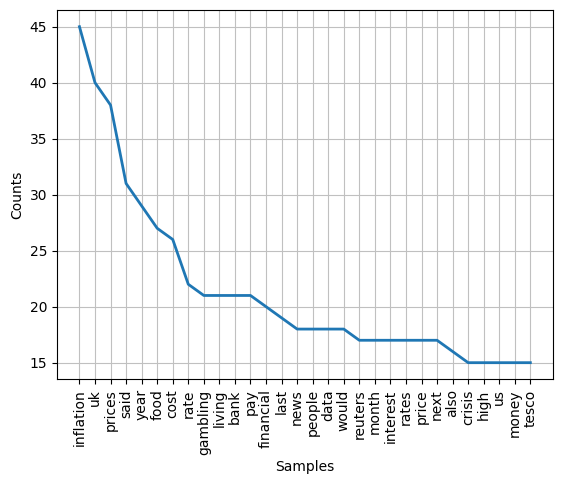

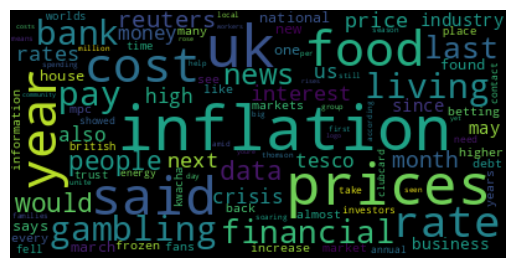

In [7]:
urls = GetArticles(query, key, url)
fdist, webpages =DataPreprocessing(urls)
Visualisations(fdist)

In [8]:
def prepare_corpus(corpus):
    #Create a corpora dictionary
    dict = corpora.Dictionary(corpus)
    #Create a term matrix
    term_matrix = [dict.doc2bow(doc) for doc in corpus]
    return dict, term_matrix

In [9]:
def create_gensim_lsa_model(corpus, number_of_topics):
    dict, doc_term_matrix = prepare_corpus(corpus) 
    #Create LSImodel
    ldamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dict)
    return ldamodel

In [10]:

def TopicModel(webpages, start, end): 
    coherencelist =[] #Create empty list of coherences
    Values = 0 
    Coherences = 0
    
    for i in range(start,end+1):
        model=create_gensim_lsa_model(webpages, i) #Create LSI model
        cm = CoherenceModel(model=model, texts=webpages, coherence='c_v') #Create coherence model
        coherence = cm.get_coherence() #Compute coherence 
        
        if coherence > Coherences: #Check for best coherence value
            Values =i
            Coherences = coherence
        coherencelist.append(coherence) #Save coherence number

        
    
    #Plot coherence score vs topic amount
    p = sns.lineplot(x=[x for x in range (start, end+1)], y=coherencelist)
    p.set(xlabel='Number of topics', ylabel='Coherence score')
    plt.show()
    
    #Return best number of topics
    return Values



   


In [11]:
def GenerateTopics(webpages, Val):
    #Create copy of best LSI model 
    model=create_gensim_lsa_model(webpages, Val)
    
    #Iterate through topics
    for i in model.show_topics(Val):
        #
        for j in i[1].split(" + "):
            vals = j.split("*")
            vals[1] = vals[1].replace('"','')
            print("%s & %s \\\\"%(vals[1], vals[0]))
        print() 

        

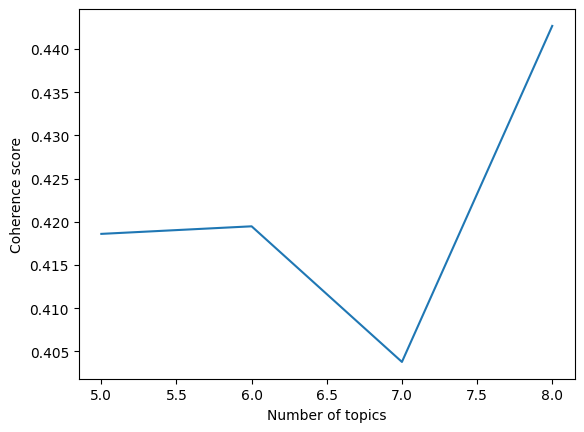

In [14]:

TopicMinimumAmount = 5 #minimum topic amounts

TopicMaximumAmount = 8 #maximum topic amounts
bestValues = TopicModel(webpages, TopicMinimumAmount, TopicMaximumAmount)


In [13]:
GenerateTopics(webpages,bestValues)


inflation & 0.355 \\
prices & 0.273 \\
uk & 0.244 \\
rate & 0.191 \\
year & 0.186 \\
bank & 0.164 \\
rates & 0.161 \\
interest & 0.161 \\
pay & 0.136 \\
next & 0.126 \\

gambling & -0.274 \\
said & -0.260 \\
financial & -0.198 \\
reuters & -0.193 \\
cost & -0.167 \\
debt & -0.156 \\
people & -0.152 \\
business & -0.137 \\
living & -0.134 \\
kwacha & -0.127 \\

fans & -0.220 \\
club & -0.171 \\
supporters & -0.171 \\
reuters & 0.153 \\
clubs & -0.147 \\
says & -0.142 \\
gambling & -0.138 \\
prices & -0.135 \\
community & -0.127 \\
season & -0.126 \\

gambling & 0.479 \\
fans & -0.148 \\
living & 0.140 \\
cost & 0.128 \\
people & 0.118 \\
supporters & -0.115 \\
club & -0.115 \\
reuters & -0.108 \\
prices & -0.105 \\
local & -0.103 \\

food & -0.436 \\
frozen & -0.355 \\
shoppers & -0.196 \\
buying & -0.190 \\
according & -0.188 \\
data & -0.171 \\
kantar & -0.160 \\
retail & -0.158 \\
gambling & 0.144 \\
bbc & -0.119 \\

debt & 0.211 \\
kwacha & 0.182 \\
tesco & -0.171 \\
million & -0.13